In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [3]:
# Import merged neighborhood-level dataset
allData = pd.read_csv('./data/analytic_dataset.csv')

## Preprocessing
- Data cleaning and handling of issues: 20 points
- Feature scaling and normalization; one-hot encoding/categorical variable handling: 20 points
- Dimensionality reduction techniques: 20 points
- Preprocessing justification and impact analysis: 20 points

In [4]:
# Streamline dataset to keep columns of interest for this analysis
keepCols = ['year', 'nta_name', 'borough', 'pct_attendance',
       'pct_chronically_absent', 'EVICTION_COUNT', 'GEOID',
       'median_sale_price', 'hvi', 'total_population',
       'median_income', 'white_pct', 'black_pct',
       'american_indian_alaska_native_pct', 'asian_pct',
       'hawaiian_pacific_islander_pct', 'multiple_race_pct', 'other_race_pct']
data = allData[keepCols]

# Rename column for format
data.rename(columns={'EVICTION_COUNT': 'num_evictions'}, inplace=True)

# Drop rows with missing values
data = data.dropna()
data.sample(10)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32428\1098084363.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'EVICTION_COUNT': 'num_evictions'}, inplace=True)


,year,nta_name,borough,pct_attendance,pct_chronically_absent,num_evictions,GEOID,median_sale_price,hvi,total_population,median_income,white_pct,black_pct,american_indian_alaska_native_pct,asian_pct,hawaiian_pacific_islander_pct,multiple_race_pct,other_race_pct
6529,2019.0,Bensonhurst,Brooklyn,94.349670,18.290258,5.0,36047025200,1205000.0,8.597928e+05,5257.0,20752.0,37.208,3.747,0.399,43.352,0.000,6.582,12.003
6844,2022.0,Park Slope,Brooklyn,90.313576,34.775642,1.0,36047016700,3700000.0,1.423803e+06,4906.0,87801.0,82.450,2.303,0.000,12.250,0.000,5.218,0.387
33174,2022.0,East Harlem (South),Manhattan,95.235420,14.990138,2.0,36061017200,1300000.0,8.624750e+05,5120.0,20104.0,28.027,46.602,0.000,3.633,0.000,10.430,16.523
62453,2020.0,Soundview-Bruckner-Bronx River,Bronx,88.244362,40.265488,1.0,36005005002,650000.0,4.610386e+05,6291.0,21383.0,5.850,28.771,0.095,1.001,0.699,5.564,60.801
62388,2020.0,Fordham Heights,Bronx,92.756683,23.825504,6.0,36005038301,649300.0,3.965357e+05,5034.0,21268.0,7.946,30.056,0.000,1.391,0.000,13.111,54.052
7475,2022.0,Brownsville,Brooklyn,84.749283,68.604652,5.0,36047090000,825000.0,5.765183e+05,4158.0,18813.0,8.826,76.335,0.000,0.000,0.000,13.131,8.273
8196,2019.0,Borough Park,Brooklyn,95.621078,12.605042,3.0,36047023200,1300000.0,9.385537e+05,5865.0,18810.0,92.072,0.699,0.529,6.121,0.000,1.159,0.000
28982,2022.0,East Harlem (North),Manhattan,75.307190,69.849243,4.0,36061018800,1300000.0,8.624750e+05,4888.0,24721.0,21.727,22.975,0.000,3.212,0.000,12.561,45.806
36244,2020.0,Far Rockaway-Bayswater,Queens,90.671585,38.659794,7.0,36081099200,577000.0,5.379437e+05,4349.0,20614.0,24.189,45.597,0.253,3.426,0.000,15.084,18.993
48965,2022.0,Jamaica Hills-Briarwood,Queens,86.682701,47.069942,2.0,36081044800,960000.0,6.044262e+05,2911.0,30843.0,8.416,6.561,1.512,50.773,0.000,18.756,23.360


In [5]:
# Show duplicate GEOIDs
data[data.duplicated(subset='GEOID')]


,year,nta_name,borough,pct_attendance,pct_chronically_absent,num_evictions,GEOID,median_sale_price,hvi,total_population,median_income,white_pct,black_pct,american_indian_alaska_native_pct,asian_pct,hawaiian_pacific_islander_pct,multiple_race_pct,other_race_pct
21,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,1.0,36047007400,1300000.0,615567.384006,5328.0,23235.0,33.296,0.638,1.126,30.593,0.0,9.685,29.505
23,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,2.0,36047007800,1300000.0,615567.384006,4873.0,26467.0,51.365,2.298,0.882,8.496,0.0,6.321,33.798
26,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,1.0,36047008400,1300000.0,615567.384006,3635.0,26059.0,45.667,2.779,1.486,5.309,0.0,8.638,40.440
28,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,1.0,36047010100,1300000.0,615567.384006,3944.0,40087.0,50.989,4.184,3.271,9.026,0.0,22.211,21.425
33,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,6.0,36047002200,1300000.0,615567.384006,4284.0,26005.0,55.042,5.999,0.000,10.994,0.0,5.042,25.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65448,2022.0,Mott Haven-Port Morris,Bronx,56.050163,88.120949,5.0,36005005100,820000.0,685357.770663,5858.0,15515.0,15.961,32.127,0.000,0.666,0.0,7.614,47.439
65449,2022.0,Mott Haven-Port Morris,Bronx,56.050163,88.120949,2.0,36005003500,820000.0,685357.770663,3738.0,20773.0,15.008,43.526,2.461,0.000,0.0,15.195,31.407
65450,2022.0,Mott Haven-Port Morris,Bronx,56.050163,88.120949,1.0,36005004100,820000.0,685357.770663,5865.0,16763.0,18.227,40.341,2.728,0.597,0.0,25.814,25.200
65451,2022.0,Mott Haven-Port Morris,Bronx,56.050163,88.120949,9.0,36005004300,820000.0,685357.770663,5421.0,17007.0,21.878,31.396,0.221,1.623,0.0,29.404,30.179


In [6]:
# Consolidate data
# One row for each neighborhood
data.drop(columns=['GEOID', 'year'], inplace=True)
data = data.groupby(['nta_name', 'borough']).agg({
    'pct_attendance': 'mean',
    'pct_chronically_absent': 'mean',
    'num_evictions': 'sum',
    'median_sale_price': 'mean',
    'hvi': 'mean',
    'total_population': 'mean',
    'median_income': 'mean',
    'white_pct': 'mean',
    'black_pct': 'mean',
    'american_indian_alaska_native_pct': 'mean',
    'asian_pct': 'mean',
    'hawaiian_pacific_islander_pct': 'mean',
    'multiple_race_pct': 'mean',
    'other_race_pct': 'mean'
}).reset_index()
data

,nta_name,borough,pct_attendance,pct_chronically_absent,num_evictions,median_sale_price,hvi,total_population,median_income,white_pct,black_pct,american_indian_alaska_native_pct,asian_pct,hawaiian_pacific_islander_pct,multiple_race_pct,other_race_pct
0,Annadale-Huguenot-Prince's Bay-Woodrow,Staten Island,90.908173,26.137263,154.0,8.405000e+05,576964.493914,6365.833333,51494.666667,93.866917,1.808000,0.000000,2.430167,0.000000,1.105500,1.342417
1,Astoria (Central),Queens,93.794789,19.178189,603.0,1.213935e+06,794270.401796,4200.217391,53675.130435,62.310522,2.515783,0.984913,17.909304,0.000000,11.758261,10.400391
2,Astoria (East)-Woodside (North),Queens,91.716040,26.626202,370.0,1.217917e+06,796630.440155,2675.125000,38265.083333,59.745375,5.943583,0.286042,16.515625,0.000000,15.829750,9.594542
3,Astoria (North)-Ditmars-Steinway,Queens,93.550828,20.996938,320.0,1.220357e+06,792394.145475,3189.500000,48089.607143,72.516250,3.075250,0.215893,9.791071,0.000000,16.656964,6.073107
4,Baisley Park,Queens,86.424383,44.085725,3912.0,6.204543e+05,415008.294886,2206.869565,32745.847826,5.066826,68.072326,0.117739,7.896174,0.000000,9.444674,14.124587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Whitestone-Beechhurst,Queens,94.934931,14.151433,30.0,1.248562e+06,901930.455390,4067.500000,35605.250000,70.201125,1.027625,0.000000,20.832250,0.048250,6.215500,4.782875
136,Williamsbridge-Olinville,Bronx,86.021315,43.032180,6045.0,6.375085e+05,548938.927176,3127.789474,27323.070175,9.479491,64.632719,1.298982,2.091439,0.064877,9.939737,17.462719
137,Williamsburg,Brooklyn,89.972248,32.687086,1110.0,1.620799e+06,973334.668612,4627.562500,66584.500000,67.312750,4.613281,0.355437,9.840094,0.039625,13.655875,11.011094
138,Woodhaven,Queens,91.799393,29.847915,216.0,7.952638e+05,639789.336878,3092.950000,32073.300000,33.039950,6.348400,0.591000,20.058450,0.000000,29.318750,25.302900


In [7]:
# Add column to categorize white/minority-dominated neighborhoods
data['minority_dominated'] = np.where((100 - data['white_pct']) > 50, "Yes", "No")
data.sample(5)

,nta_name,borough,pct_attendance,pct_chronically_absent,num_evictions,median_sale_price,hvi,total_population,median_income,white_pct,black_pct,american_indian_alaska_native_pct,asian_pct,hawaiian_pacific_islander_pct,multiple_race_pct,other_race_pct,minority_dominated
90,Norwood,Bronx,89.636308,39.269907,2871.0,7.206250e+05,5.023061e+05,5037.250000,22557.250000,29.837750,19.484208,0.328500,9.609583,0.050667,12.822375,34.278167,Yes
99,Prospect Heights,Brooklyn,91.843608,28.655463,104.0,2.926538e+06,1.345957e+06,3625.000000,68594.846154,62.017000,17.361769,0.080615,8.394077,0.000000,17.983462,3.154615,No
13,Bensonhurst,Brooklyn,92.898665,22.356910,1150.0,1.257396e+06,8.681101e+05,3617.416667,23886.250000,42.795021,0.785187,0.381083,42.782917,0.000000,6.348792,10.081500,Yes
68,Jamaica Hills-Briarwood,Queens,90.126268,31.767276,550.0,9.108333e+05,5.250633e+05,4882.266667,30728.666667,19.350867,14.296733,0.606133,40.662667,0.000000,13.586800,18.290000,Yes
23,Carroll Gardens-Cobble Hill-Gowanus-Red Hook,Brooklyn,89.725861,31.391453,902.0,2.937576e+06,1.649011e+06,3507.454545,59152.484848,62.709939,16.105333,0.301788,6.501394,0.227000,13.153788,7.577545,No


In [8]:
# Separate data into features and a label
X = data.drop(['nta_name'], axis=1)
y = data['nta_name']

In [9]:
# Build preprocessing pipelines
catCols = ['borough', 'minority_dominated']
numCols = X.columns.drop(catCols)
numPC = 4 # Number of principal components to use

# Numerical variable pipeline
numPipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define column transformer
preprocessor = ColumnTransformer([
    ('num', numPipe, numCols),
    ('cat', OneHotEncoder(), catCols)
])

# Pipeline with dimension reduction
fullPipe = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA(n_components=numPC))
])

In [10]:
# Fit and transform features
X_pca = fullPipe.fit_transform(X)

In [11]:
# Report percent of variance explained by PCA with 4 components
evr = fullPipe.named_steps['pca'].explained_variance_ratio_
print(f"Percent variance retained in first {numPC} PCs: {100*evr}%")
print(f"Sum of percent variance explained by first 4 PCs: {100*sum(evr):.2f}%")

Percent variance retained in first 4 PCs: [29.96693295 19.19379624 11.31293156  6.77138585]%
Sum of percent variance explained by first 4 PCs: 67.25%


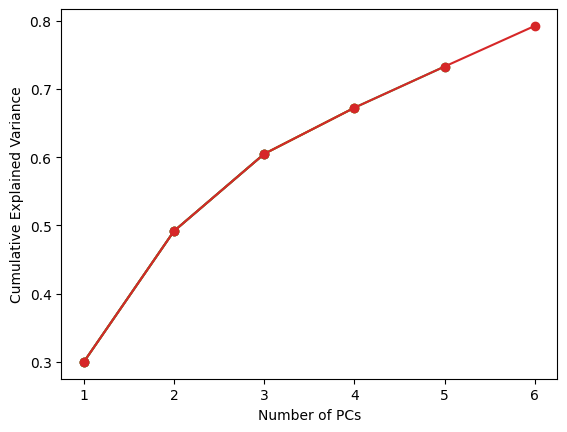

In [13]:
for numPC in range(3,7):
    fullPipe.named_steps['pca'].n_components = numPC
    X_pca = fullPipe.fit_transform(X)
    evr = fullPipe.named_steps['pca'].explained_variance_ratio_
    plt.plot(range(1, numPC+1), np.cumsum(evr), marker="o", label=f'{numPC} PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Explained Variance')
plt.show()